# word ngram

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/seema/2nd_data.csv')
df.head()

,Tweet,True Label,Sub,sub_labels
0,هذا تاريخ الخبيث اللي تروجله ياوهمي متطرف اخون...,1,P-HS,0
1,في نتألم جميعا كيف اصبح حال الشعب اليمني المظل...,1,P-HS,0
2,من كان يتوقع أن السعودية التي كانت تعاقب من يف...,1,R-HS,1
3,لن نجد اخس واذل من مان يستهدفون المدنيين ويقتل...,1,S-HS,2
4,إمعة وغبي وكذاب صفات الرئيس المنتدب الفطرية,1,P-HS,0


In [ ]:
y =  df['sub_labels'].values

Training for fold 1 ...
Confusion Matrix for fold 1:


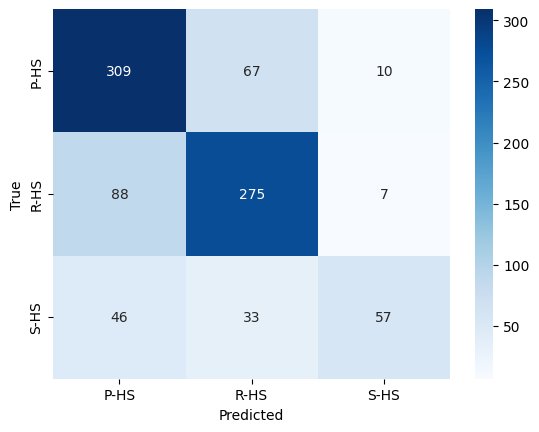

Training for fold 2 ...
Confusion Matrix for fold 2:


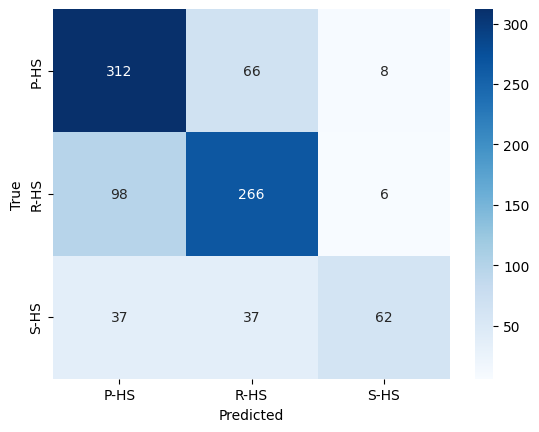

Training for fold 3 ...
Confusion Matrix for fold 3:


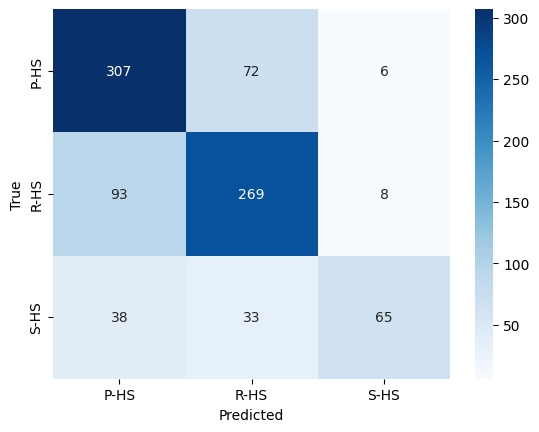

Training for fold 4 ...
Confusion Matrix for fold 4:


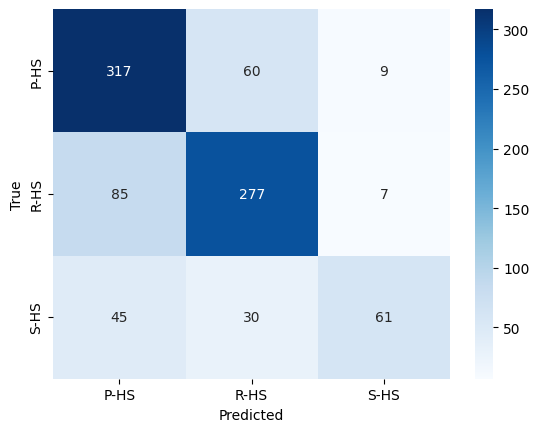

Training for fold 5 ...
Confusion Matrix for fold 5:


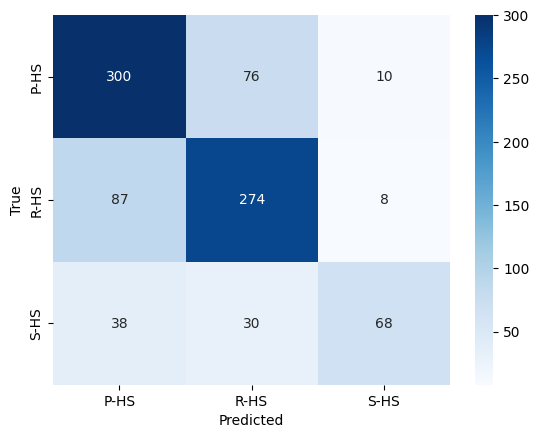


Mean Metrics Across All Folds:
Mean Accuracy: 0.722236565958539
Mean Precision: 0.7434996190148477
Mean Recall: 0.6659027462057845
Mean F1 Score: 0.6883320091363505

Aggregated Confusion Matrix:


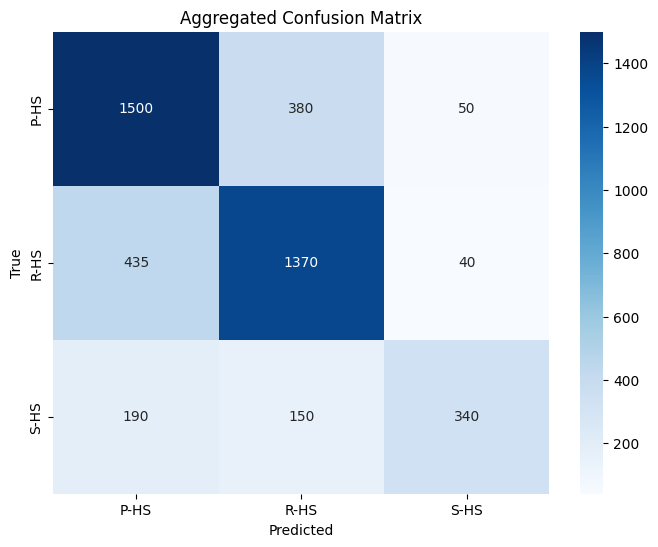

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Step 3: Stratified 5-Fold Cross-Validation for SVM
skf = StratifiedKFold(n_splits=5)
scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the SVM model
    svm_model = SVC(kernel='linear')

    # Train the model
    print(f'Training for fold {fold + 1} ...')
    svm_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])  # Labels order: S-HS, P-HS, R-HS
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(np.sum(np.array([confusion_matrix(y_test, svm_model.predict(X_test), labels=[2, 0, 1]) for _, (_, test_index) in enumerate(skf.split(X_tfidf, y))]), axis=0),
            annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
plt.show()


# **char ngrame**

Training for fold 1 ...
Confusion Matrix for fold 1:


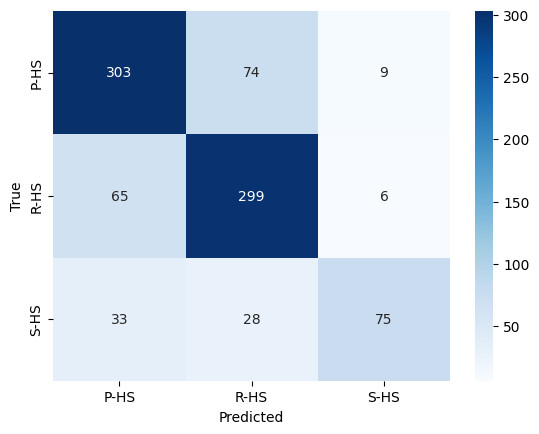

Training for fold 2 ...
Confusion Matrix for fold 2:


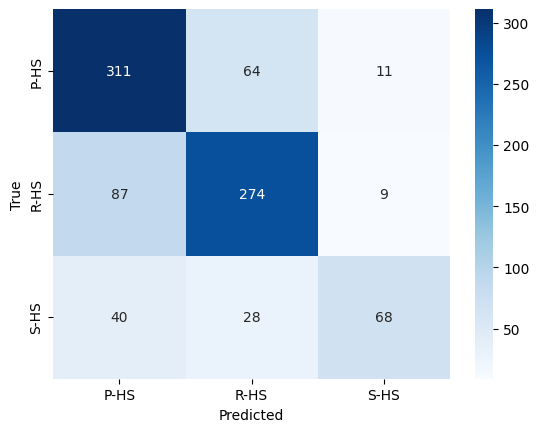

Training for fold 3 ...
Confusion Matrix for fold 3:


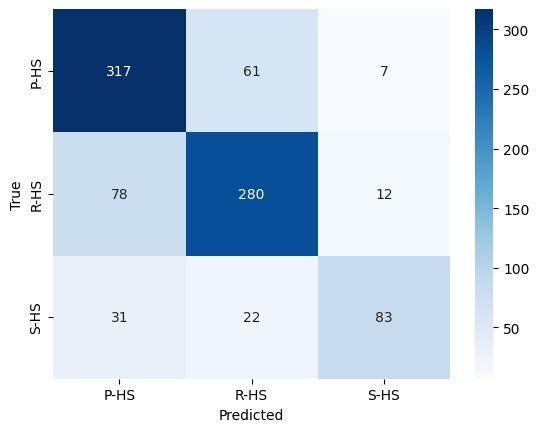

Training for fold 4 ...
Confusion Matrix for fold 4:


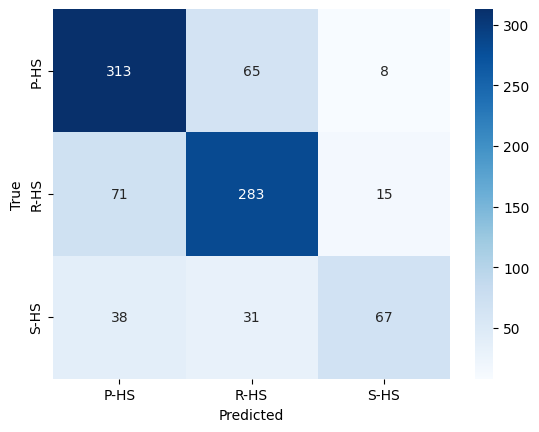

Training for fold 5 ...
Confusion Matrix for fold 5:


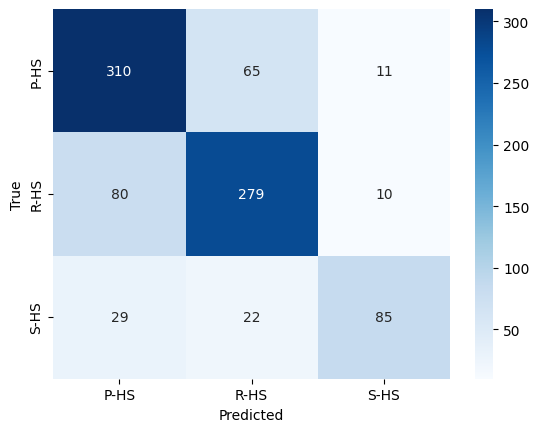


Mean Metrics Across All Folds:
Mean Accuracy: 0.750955997443292
Mean Precision: 0.762138997831102
Mean Recall: 0.7090594824183631
Mean F1 Score: 0.7276885507561663

Aggregated Confusion Matrix:


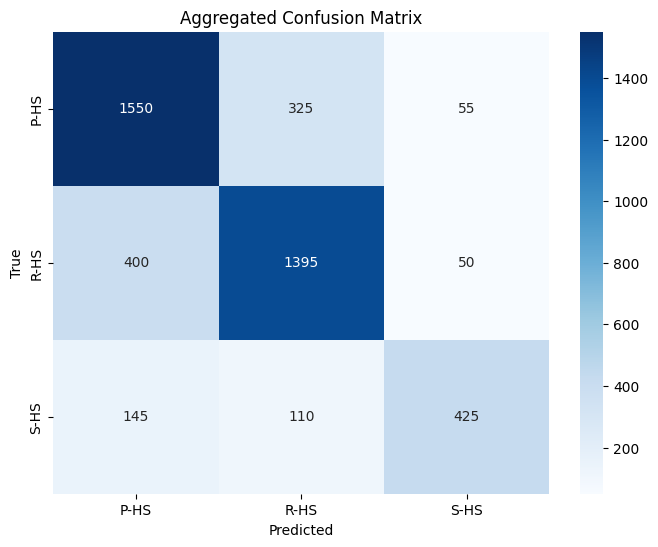

In [ ]:

tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Step 3: Stratified 5-Fold Cross-Validation for SVM
skf = StratifiedKFold(n_splits=5)
scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the SVM model
    svm_model = SVC(kernel='linear')

    # Train the model
    print(f'Training for fold {fold + 1} ...')
    svm_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])  # Labels order: S-HS, P-HS, R-HS
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(np.sum(np.array([confusion_matrix(y_test, svm_model.predict(X_test), labels=[2, 0, 1]) for _, (_, test_index) in enumerate(skf.split(X_tfidf, y))]), axis=0),
            annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
plt.show()


# **word/char ngrame**

In [ ]:
y=df['sub_labels']

Training for fold 1 ...
Confusion Matrix for fold 1:


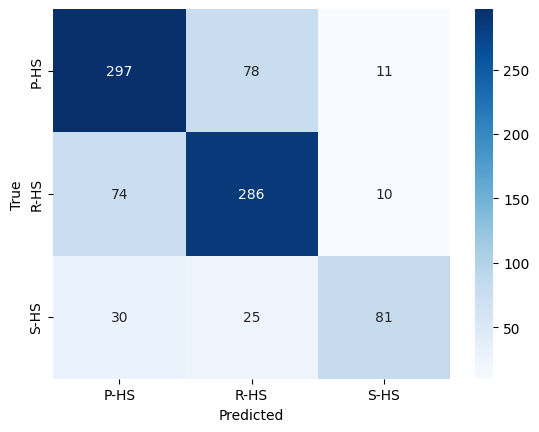

Training for fold 2 ...
Confusion Matrix for fold 2:


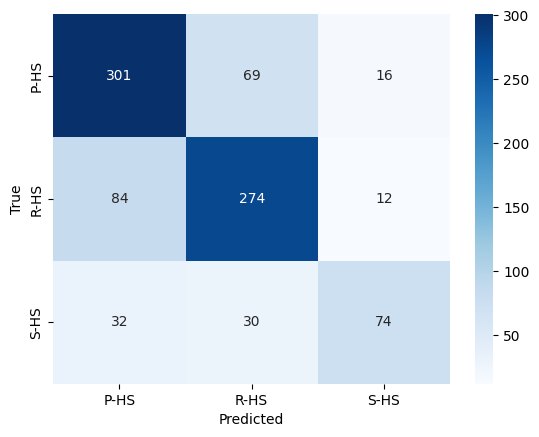

Training for fold 3 ...
Confusion Matrix for fold 3:


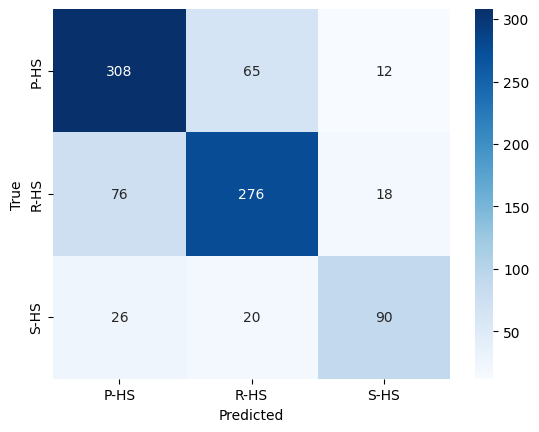

Training for fold 4 ...
Confusion Matrix for fold 4:


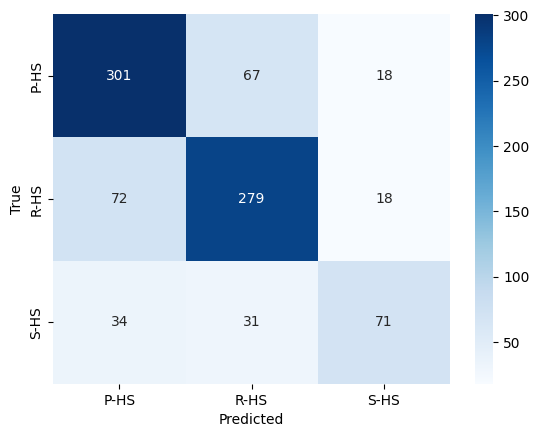

Training for fold 5 ...
Confusion Matrix for fold 5:


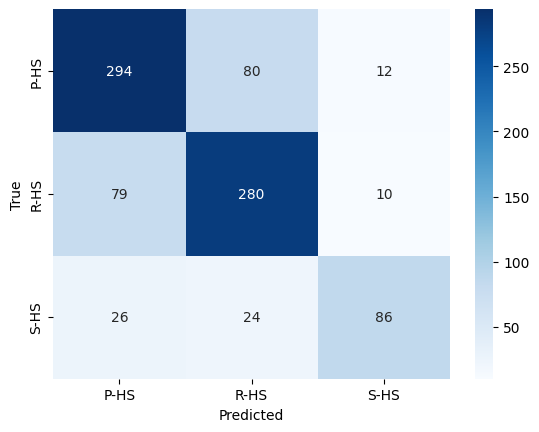


Mean Metrics Across All Folds:
Mean Accuracy: 0.7399613977341929
Mean Precision: 0.7415407621393155
Mean Recall: 0.708061369105444
Mean F1 Score: 0.7213596281659093

Aggregated Confusion Matrix:


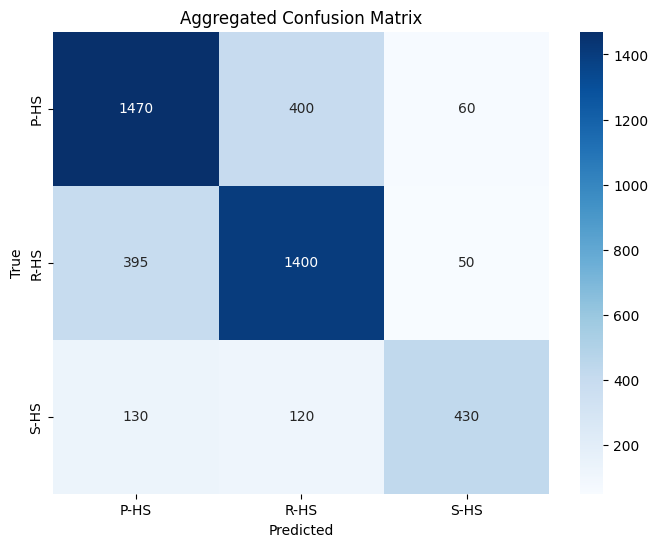

In [ ]:

# Word N-grams
word_tfidf_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), max_features=2500)
X_word_tfidf = word_tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Character N-grams
char_tfidf_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=2500)
X_char_tfidf = char_tfidf_vectorizer.fit_transform(df['Tweet']).toarray()

# Concatenate word and character n-grams features
X_tfidf = np.concatenate((X_word_tfidf, X_char_tfidf), axis=1)

# Step 3: Stratified 5-Fold Cross-Validation for SVM
skf = StratifiedKFold(n_splits=5)
scores = []

for fold, (train_index, test_index) in enumerate(skf.split(X_tfidf, y)):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize the SVM model
    svm_model = SVC(kernel='linear')

    # Train the model
    print(f'Training for fold {fold + 1} ...')
    svm_model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    scores.append((accuracy, precision, recall, f1))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[2, 0, 1])  # Labels order: S-HS, P-HS, R-HS
    print(f'Confusion Matrix for fold {fold + 1}:')
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Calculate and print the average scores across all folds
avg_scores = np.mean(np.array(scores), axis=0)
mean_accuracy, mean_precision, mean_recall, mean_f1_score = avg_scores
print('\nMean Metrics Across All Folds:')
print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Precision: {mean_precision}')
print(f'Mean Recall: {mean_recall}')
print(f'Mean F1 Score: {mean_f1_score}')

# Plot the aggregated confusion matrix
print('\nAggregated Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(np.sum(np.array([confusion_matrix(y_test, svm_model.predict(X_test), labels=[2, 0, 1]) for _, (_, test_index) in enumerate(skf.split(X_tfidf, y))]), axis=0),
            annot=True, fmt='d', cmap=plt.cm.Blues,
            xticklabels=['P-HS', 'R-HS', 'S-HS'], yticklabels=['P-HS', 'R-HS', 'S-HS'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Aggregated Confusion Matrix')
plt.show()
